In [66]:
import matplotlib.pyplot as plt
import numpy as np
import glob


In [46]:
datdir = './data/'

In [401]:
npzfiles = glob.glob(datdir+'*.npz')
npzfiles.sort()

In [403]:
npzfiles[0:4]

['./data/run_0.npz',
 './data/run_1.npz',
 './data/run_10.npz',
 './data/run_100.npz']

In [280]:
pk_max = 1e2
kk = np.logspace(-4, np.log10(pk_max), 500)

In [404]:
N_points = 30  # Number of grid points in each dimension
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

In [406]:
pks = []
T_recs = []
A_recs = []
T_A_recs = []
for npzfile in npzfiles:
    data = np.load(npzfile)
    pk = data['Pk']
    pks.append(pk)
    T_recs.append(data['T_rec'].item())
    A_recs.append(data['A_rec'].item())
    T_A_recs.append((data['T_rec'].item(),data['A_rec'].item()))

In [407]:
#Returns sorted unique list of each
T_recs_unique = np.unique(T_recs)
A_recs_unique = np.unique(A_recs)

#Create pk grid
pk_dat = np.zeros((len(T_recs_unique), len(A_recs_unique), len(kk)))

In [410]:
#populate pk grid such that pk is a function of T_rec and A_rec
for i, T in enumerate(T_recs_unique):
    for j, A in enumerate(A_recs_unique):
        pk_dat[i, j, :] = pks[T_A_recs.index((T, A))]

(1.0, 100.0)

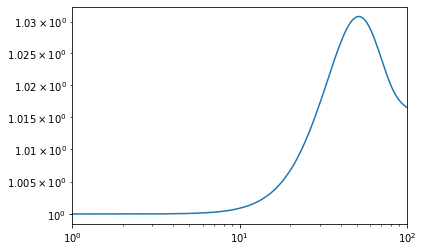

In [433]:
plt.plot(kk,pk_dat[0, 0, :]/pk_dat[20, 20, :])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e2)
# plt.ylim(1e-3,1e0)

## Interpolation

In [138]:
from scipy.interpolate import RegularGridInterpolator
def f(x, y, z):
    return 2 * x**3 + 3 * y**2 - z
x = np.linspace(1, 4, 2)
y = np.linspace(4, 7, 3)
z = np.linspace(7, 9, 4)
xg, yg ,zg = np.meshgrid(x, y, z, indexing='ij')
data = f(xg, yg, zg)

In [441]:
# Want points to be strictly increasing
T_recsg, A_recsg, kkg = np.meshgrid(T_recs_unique, A_recs_unique, kk, indexing='ij')

In [456]:
pks_interp = RegularGridInterpolator((T_recs_unique, A_recs_unique, kk), pk_dat)

In [464]:
pk_dat[0,0,-1]

0.0003863463105989911

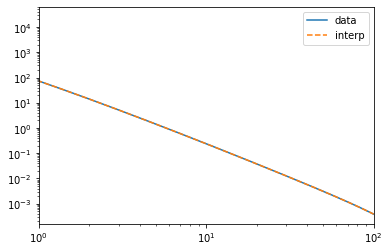

In [470]:
plt.plot(kk, pk_dat[0,0,:], label='data')
plt.plot(kk, pks_interp((T_recs_unique[0], A_recs_unique[0], kk)),'--', label='interp')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e2)
plt.legend()
plt.show()

In [95]:
my_interpolating_function = RegularGridInterpolator((x, y, z), data)

In [102]:
my_interpolating_function(np.array([[2, 4.5, 7.5]]))

array([69.50930612])

In [93]:
T_recs

[100000.0, 127427.49857031347, 162377.67391887208, 10000000.0]

In [16]:
print(data.files)

['zs', 'Pk', 'dmu_idm_dr']


In [46]:
filenames = glob.glob(datdir+'phase*_pk.dat')

In [47]:
filenames[0]

'./output/phase_transition00_pk.dat'

TypeError: can only concatenate list (not "str") to list

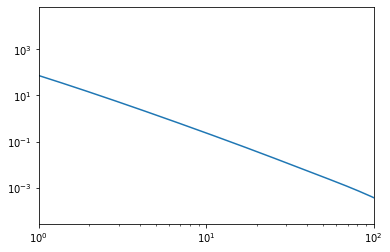

In [41]:
data = np.loadtxt(filename[0])
plt.plot(data[:,0],data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,1e2)
plt.savefig(filename+'.png')

array([[1.04504540e-05, 5.24701045e+01],
       [2.33441383e-05, 1.13671401e+02],
       [3.62832291e-05, 1.73729445e+02],
       ...,
       [1.36895140e+02, 1.19000660e-04],
       [1.45006688e+02, 9.35502964e-05],
       [1.53598874e+02, 7.26284904e-05]])